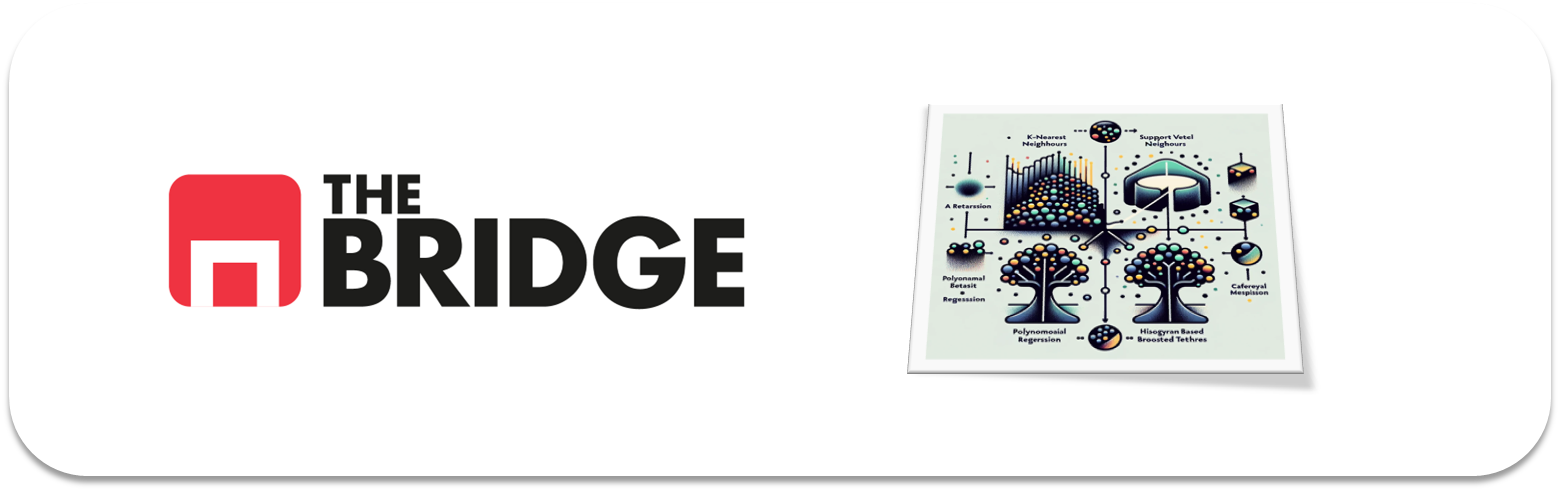

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [22]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df= pd.read_csv("./data/credit_npo.csv")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [19]:
df.isna().mean()

target                                  0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.057510
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.014118
dtype: float64

In [4]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


- SeriousDlqin2yrs-	Indicador binario (0 o 1) de si la persona ha tenido un impago grave en 2 años- **Target**

- RevolvingUtilizationOfUnsecuredLines: Porcentaje de uso del crédito disponible en líneas no garantizadas

- age: Edad del individuo en años

- NumberOfTime30-59DaysPastDueNotWorse:	Número de veces con retraso de 30-59 días en el pago (sin llegar a peor estado)

- DebtRatio:	Relación entre deuda mensual total y el ingreso mensual bruto

- MonthlyIncome:	Ingreso mensual declarado (puede haber valores nulos)

- NumberOfOpenCreditLinesAndLoans:	Número total de líneas de crédito abiertas y préstamos

- NumberOfTimes90DaysLate:	Número de veces con pagos retrasados más de 90 días

- NumberRealEstateLoansOrLines:	Número de hipotecas o líneas de crédito inmobiliario

- NumberOfTime60-89DaysPastDueNotWorse:	Número de veces con retrasos de 60-89 días de pago

- NumberOfDependents:	Número de personas dependientes económicamente (puede ser decimal si hay nulos)

In [5]:
df.rename(columns = {'SeriousDlqin2yrs': 'target'}, inplace=True)

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Un problema de regresión logística, clasificación binaria

### #1.3
Pinta la distribución de frecuencias del target y coméntala

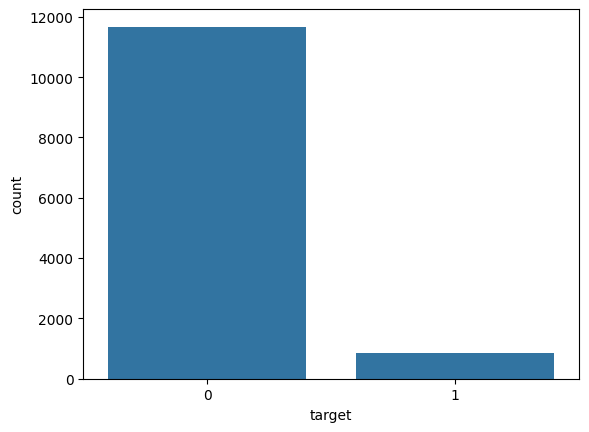

In [7]:
sns.countplot(data=df, x='target');

Lo que se observa es que aproximadamente el 93% de los casos son negativos (no impago) y solo el 7% positivos (con impago).
Esta distribución está altamente desbalanceada.
Cuando hagamos modelos predictivos, este desequilibrio puede causar que los modelos predigan siempre la clase mayoritaria, no impago.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [9]:
from sklearn.model_selection import train_test_split 

X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

<class 'pandas.core.frame.DataFrame'>
Index: 10029 entries, 5441 to 7270
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  10029 non-null  float64
 1   age                                   10029 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  10029 non-null  int64  
 3   NumberOfTimes90DaysLate               10029 non-null  int64  
 4   NumberOfTime60-89DaysPastDueNotWorse  10029 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 470.1 KB


In [10]:
#Hacemos un MiniEda


df_eda = X_train.copy()
df_eda["target"] = y_train.copy()

In [11]:
corr = np.abs(df_eda.corr()['target']).sort_values(ascending=False)

# Features con menos de 0.1 de correlación vs el target
bad_corr_feat = corr[corr < 0.05].index.values

# Filtramos las columnas buenas
df_eda.drop(columns=bad_corr_feat, inplace=True)

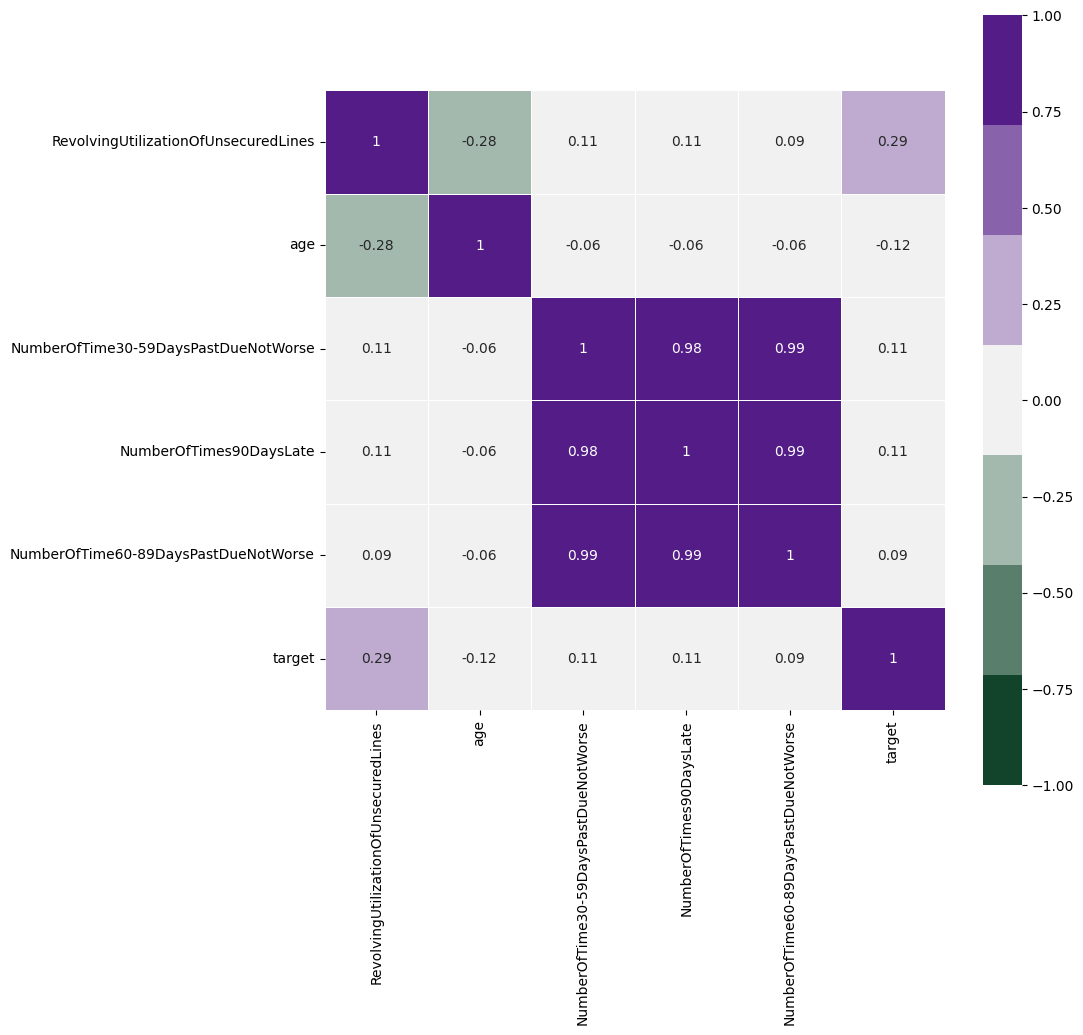

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df_eda.corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

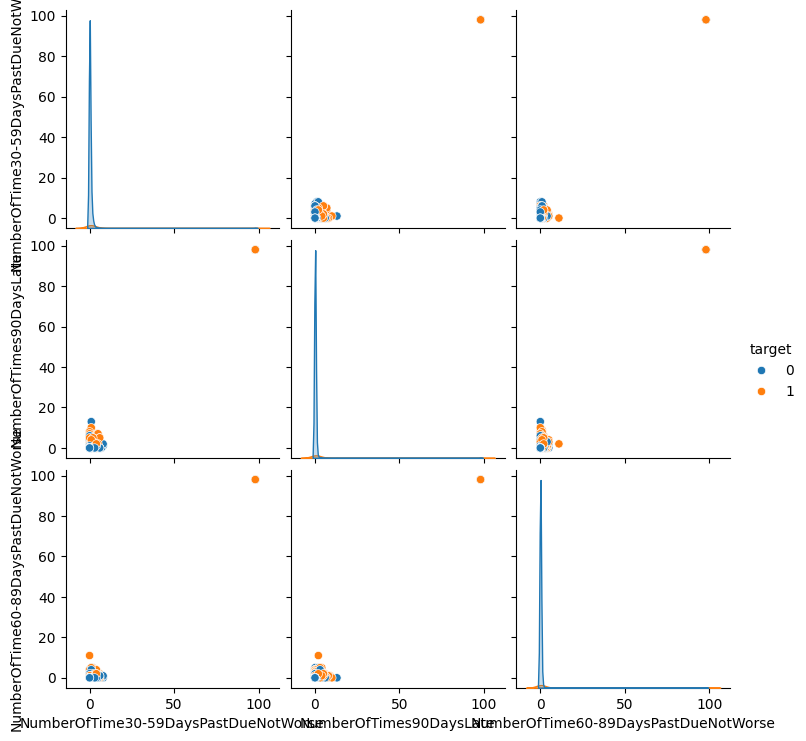

In [13]:
sns.pairplot(df_eda[[col for col in df_eda.columns if "NumberOf" in col or col == "target"]], hue = "target")

In [14]:
features_num = [col for col in df_eda.columns if "target" not in col]
X_train = X_train[features_num].copy()

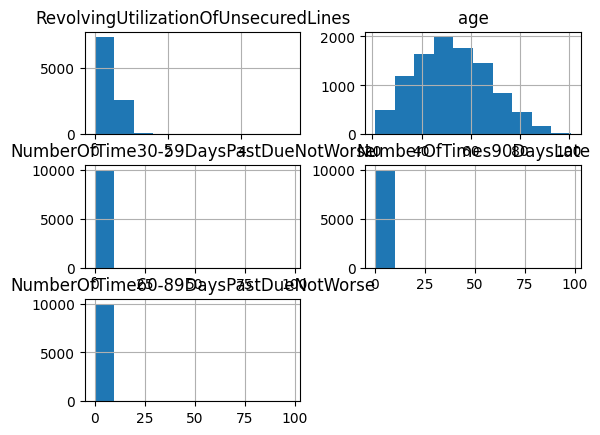

In [35]:
X_train.hist();

#Parece que vamos a tener que hacer log a varias variables

In [16]:
X_train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
count,10029.000000,10029.000000,10029.00000,10029.000000,10029.000000
mean,0.332534,52.006681,0.40014,0.250972,0.221258
std,0.368161,15.064668,3.96043,3.940818,3.923659
min,0.000000,21.000000,0.00000,0.000000,0.000000
25%,0.030773,41.000000,0.00000,0.000000,0.000000
50%,0.164421,51.000000,0.00000,0.000000,0.000000
75%,0.588571,62.000000,0.00000,0.000000,0.000000
max,5.347652,101.000000,98.00000,98.000000,98.000000


In [81]:
imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
# Realizar predicciones con validación cruzada para cada modelo
y_pred_knn_cv = cross_val_predict(KNeighborsClassifier(), X_scaled, y, cv=5)
y_pred_log_cv = cross_val_predict(LogisticRegression(max_iter=1000), X_scaled, y, cv=5)
y_pred_rf_cv = cross_val_predict(RandomForestClassifier(random_state=42), X_scaled, y, cv=5)

# Reports
print(classification_report(y, y_pred_knn_cv, output_dict=False))
print(classification_report(y, y_pred_log_cv, output_dict=False))
print(classification_report(y, y_pred_rf_cv, output_dict=False))



              precision    recall  f1-score   support

           0       0.94      0.99      0.96     11673
           1       0.55      0.11      0.18       864

    accuracy                           0.93     12537
   macro avg       0.74      0.55      0.57     12537
weighted avg       0.91      0.93      0.91     12537

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11673
           1       0.56      0.06      0.11       864

    accuracy                           0.93     12537
   macro avg       0.75      0.53      0.54     12537
weighted avg       0.91      0.93      0.91     12537

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     11673
           1       0.60      0.19      0.29       864

    accuracy                           0.94     12537
   macro avg       0.77      0.59      0.63     12537
weighted avg       0.92      0.94      0.92     12537



In [ ]:
# Mejor ha salido Random Forest


In [80]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
rf_base = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros para ajustar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

# GridSearch con validación cruzada enfocada en recall
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Ajustar con los datos completos ya escalados
grid_search.fit(X_scaled, y)

# Guardar el mejor modelo encontrado
best_rf_model = grid_search.best_estimator_
best_rf_model


Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
best_rf_model.fit(X_scaled, y)
y_pred_best = best_rf_model.predict(X_scaled)


print(classification_report(y, y_pred_best, output_dict=False))

#Mejora bastante el recall de Impago


              precision    recall  f1-score   support

           0       0.99      0.92      0.95     11673
           1       0.44      0.83      0.57       864

    accuracy                           0.91     12537
   macro avg       0.71      0.87      0.76     12537
weighted avg       0.95      0.91      0.93     12537



In [83]:
best_rf_model.fit(X_scaled, y_train)

y_pred_test = best_rf_model.predict(X_test_scaled)

# Evaluar
print(classification_report(y_test, y_pred_test))



#Mejora bastante el recall de Impago


              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2345
           1       0.22      0.55      0.31       163

    accuracy                           0.84      2508
   macro avg       0.59      0.71      0.61      2508
weighted avg       0.92      0.84      0.87      2508



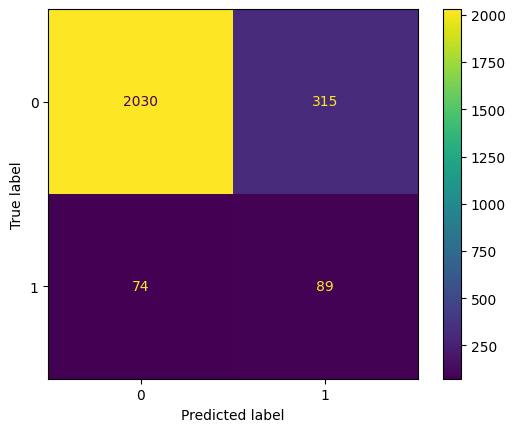

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

El modelo detecta muchos más casos de impago que antes (mejor recall clase 1), gracias a:
- class_weight='balanced'

- mayor profundidad y más árboles

Sin embargo, todavía confunde algunos impagos como no-impagos (falsos negativos), lo que podría ser crítico según el contexto del negocio.
La precisión en clase 1 (cuando predice impago, ¿cuántas veces acierta?) se mantiene razonable, lo cual ayuda a evitar demasiados falsos positivos.

Se podría beneficiar de:

SMOTE- para maximizar el recall